# GDP and Life Expectancy

## Overview

In this project the relationship between the Life Expectancy of the people of a country and its GDP will be studied.

## Project Goals

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?


### Data

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

### Procedure

+ Load Data and Libraries
+ Check if data needs cleaning and tidying
+ Explore the data
+ Experiment and explore the data with the different types of plots in order to answer all the above questions

### Import relevant libraries and load the csv files into respective Dataframes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("all_data.csv")

### Explore the data

In [3]:
data.head()
#data.count()
#data.describe()
#data.columns
#data.dtypes

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [5]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

### Clean the column names

In [6]:
data.rename({'Life expectancy at birth (years)': 'LEAB'}, axis = 'columns', inplace = True)

In [7]:
data.columns
#check if change was successfull

Index(['Country', 'Year', 'LEAB', 'GDP'], dtype='object')

#### Has life expectancy increased over time in the six nations?

Plot Life expectancy using normal line plot:

Text(0, 0.5, 'Life expectancy at birth in years')

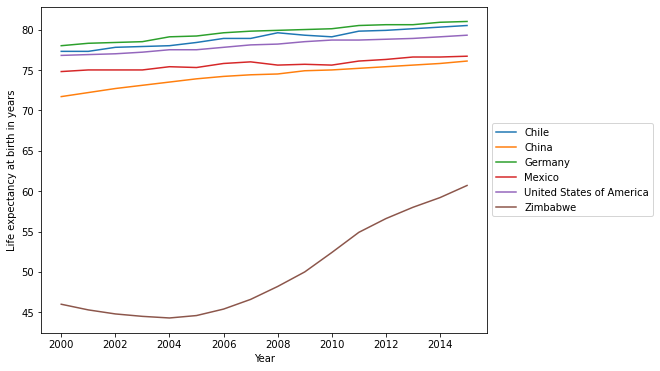

In [8]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.LEAB, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth in years")

Difficult to see individual growth using the same scale.
Therefore helpful to look at countries individually using different scales:

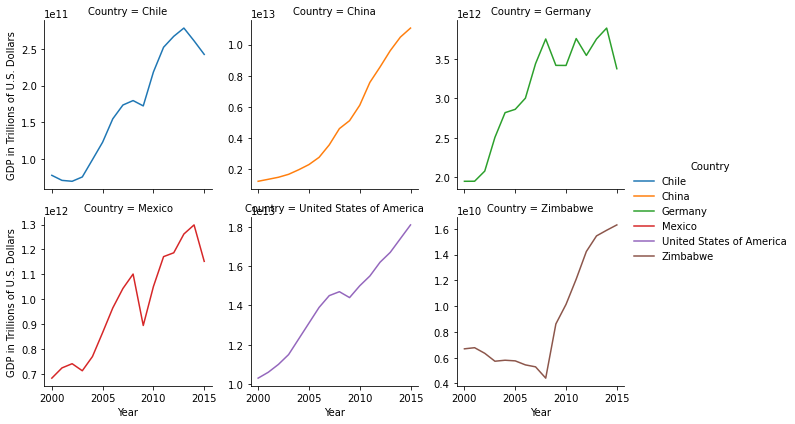

In [9]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP

#### Has GDP increased over time in the six nations?

Plot GDP using normal line plot:

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

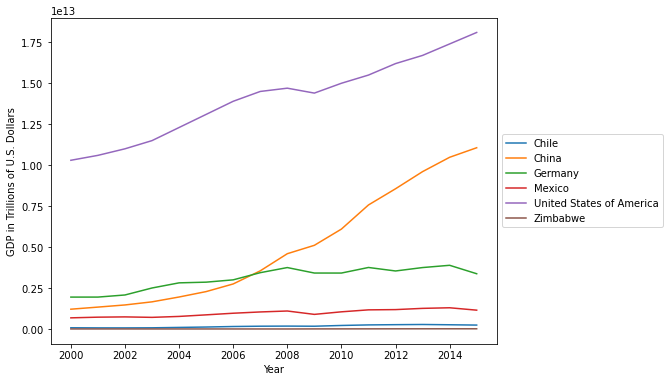

In [10]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")

Difficult to see individual growth using the same scale.
Therefore helpful to look at countries individually using different scales:

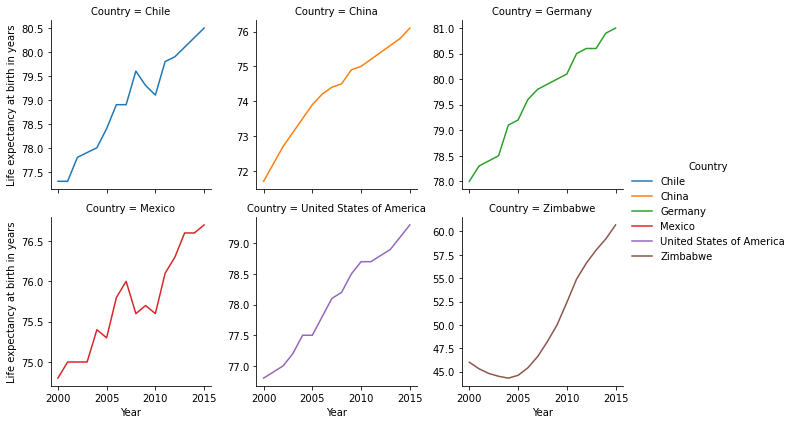

In [11]:
graphLEAB = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEAB = (graphLEAB.map(sns.lineplot,"Year","LEAB")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth in years"))

graphLEAB

#### Is there a correlation between GDP and life expectancy of a country?

Use scatter plot to showcase correlation between two numerical varibles:

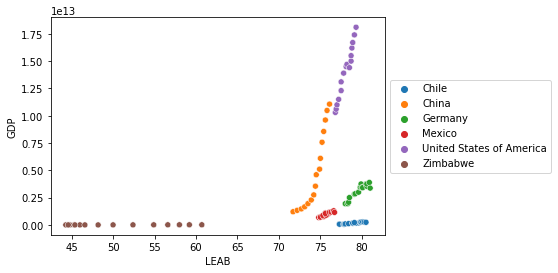

In [19]:
sns.scatterplot(x=data.LEAB, y=data.GDP, hue=data.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Due to vastly different magnitutes of GDP and Life expectancy, using different scales will help visualize the correlation:

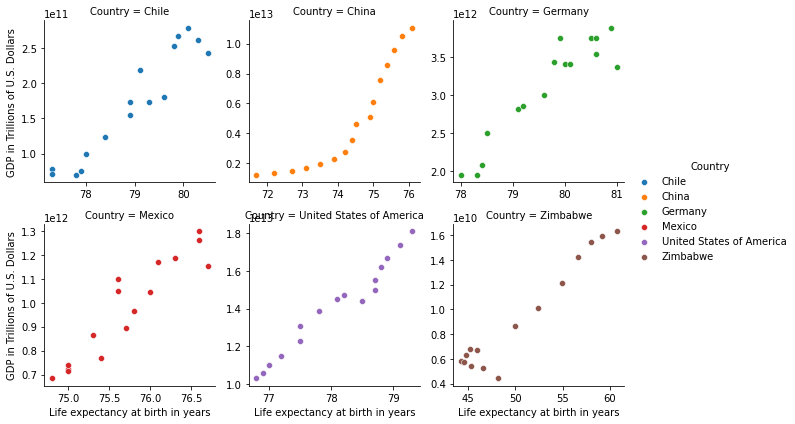

In [20]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEAB", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth in years", "GDP in Trillions of U.S. Dollars"));


#### What is the distribution of that life expectancy and GDP?

Distribution of Life Expectancy shown through a histogramm:

Text(0.5, 6.79999999999999, 'Life expectancy at birth in years')

<Figure size 720x576 with 0 Axes>

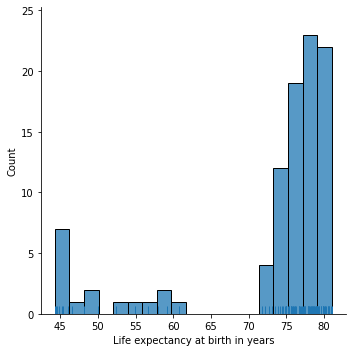

In [12]:
plt.figure(figsize=(10,8))
sns.displot(data.LEAB, rug = True, kde=False)
plt.xlabel("Life expectancy at birth in years")

Distribution of GDP shown through a histogramm:

Text(0.5, 6.79999999999999, 'GDP in Trillions of U.S. Dollars')

<Figure size 720x576 with 0 Axes>

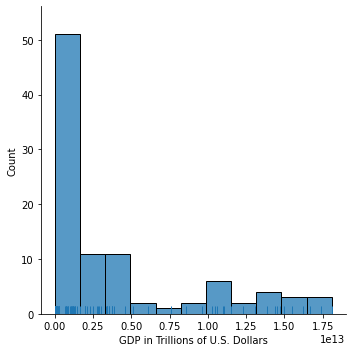

In [13]:
plt.figure(figsize=(10,8))
sns.displot(data.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")

#### What is the average life expectancy and GDP in these nations?

Calculate the average of the GDP and LEAB in order to showcase GDP and LEAB per Country:

In [14]:
dataMeans = data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dataMeans

,Country,LEAB,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


LEAB per Country:

Text(0.5, 0, 'Life expectancy at birth (years)')

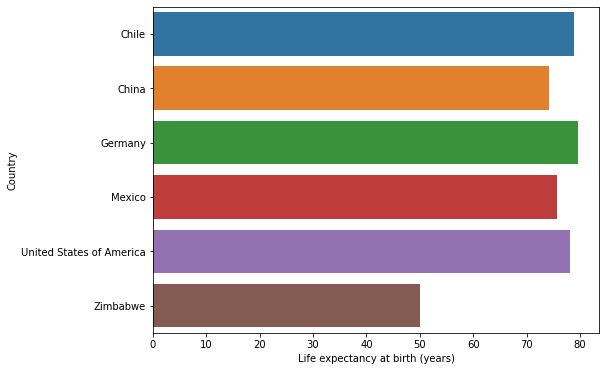

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEAB", y="Country", data=dataMeans)
plt.xlabel("Life expectancy at birth (years)")

GDP per Country:

Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

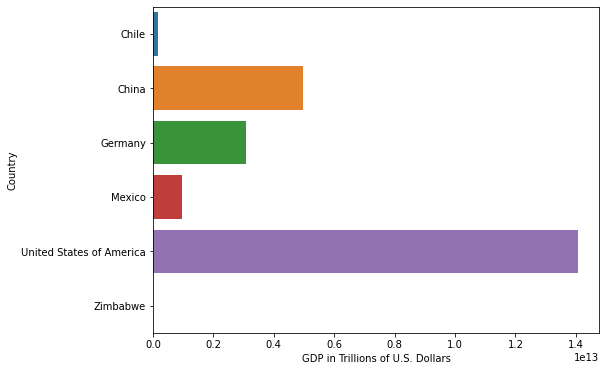

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dataMeans)
plt.xlabel("GDP in Trillions of U.S. Dollars")

## Conclusion:

+ Has life expectancy increased over time in the six nations?
    + Yes life expectancy has increased in all nations, witht the biggest increase in Zimbabwe.
+ Has GDP increased over time in the six nations?
    + Chinas GDP has increase the most, while all the others also nations GDP also increased.
+ Is there a correlation between GDP and life expectancy of a country?
    + There is a clear positive correlation between GDP and life expectancy for all nations.
+ What is the average life expectancy in these nations?
    + Average life expectancy is in the high 70s, except for Zimbabwe, where it is around 50.
+ What is the distribution of that life expectancy?
    + Life expectancy is left scewed, almost bipidal. With most countries having higher life expectancy and Zimbabwe being on the other end of the spectrum. GDP is almost mirrored. Having a right scew, due to the fact america has a much higher GDP than the other countries.